## VIP Clients

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [5]:
sales = pd.read_csv("sales_v3.csv")
vip_info = pd.read_csv("vip_v6.csv")

/Users/baochen/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
vip_info.vip_key.is_unique

True

In [7]:
vip_info.head()

,vip_key,region_key,vip_brand_code,vip_no,vip_issue_date,vip_issue_loc,vip_expiry_date,vip_birth_date,vip_birth_iyy,vip_birth_imm,vip_birth_idd,vip_sex,vip_nation,vip_status,vip_no_edm,vip_no_dm,vip_no_phone,vip_no_sms,vip_card_prod_date,vip_pickup_loc,vip_postal,vip_dist_desc,vip_first_pur_date,vip_last_pur_date,vip_opt_in,vip_jm_vip_type,vip_jm_first_pur_date,vip_type,monetary,last_purchased_date,recency,is_active,r_score,f_score,m_score,segment,is_discount_savvy,avg_unit,avg_unit_class,aw_monetary,ss_monetary,seasonal_pref,ss_purchases,aw_purchases,number_of_purchases,multiple_purchases,activation_days,bu
0,1649081,CN,KS,KS201890556,2018-04-30 00:00:00.0000000,KSS02202,2999-12-31 00:00:00.0000000,NaN,0.0,0.0,0.0,F,CN,NaN,Y,Y,Y,Y,NaN,KSS02202,NaN,NaN,2018-04-30 00:00:00.0000000,2018-04-30 00:00:00.0000000,N,NaN,NaN,Outlet,2028.60,2018-04-30 00:00:00,177.0,1,3,2,3,Potential Loyalist,0,2.0,2,0.0,2028.60,SS,1,0,1,0,0.0,WB
1,1649082,CN,KS,KS201890557,2018-04-30 00:00:00.0000000,KSS02202,2999-12-31 00:00:00.0000000,NaN,0.0,0.0,0.0,F,CN,NaN,Y,Y,Y,Y,NaN,KSS02202,NaN,NaN,2018-04-30 00:00:00.0000000,2018-04-30 00:00:00.0000000,N,NaN,NaN,Outlet,2927.90,2018-04-30 00:00:00,177.0,1,3,2,4,Potential Loyalist (High Spending),0,2.0,2,0.0,2927.90,SS,1,0,1,0,0.0,WB
2,1649083,CN,KS,KS201890558,2018-04-30 00:00:00.0000000,KSS02202,2999-12-31 00:00:00.0000000,NaN,1990.0,4.0,29.0,F,CN,NaN,Y,Y,Y,Y,NaN,KSS02202,NaN,NaN,2018-04-30 00:00:00.0000000,2018-04-30 00:00:00.0000000,N,NaN,NaN,Outlet,1702.00,2018-04-30 00:00:00,177.0,1,3,2,3,Potential Loyalist,0,2.0,2,0.0,1702.00,SS,1,0,1,0,0.0,WB
3,1649084,CN,KS,KS201890559,2018-04-30 00:00:00.0000000,KSS02202,2999-12-31 00:00:00.0000000,NaN,0.0,0.0,0.0,F,CN,NaN,Y,Y,Y,Y,NaN,KSS02202,NaN,NaN,2018-04-30 00:00:00.0000000,2018-04-30 00:00:00.0000000,N,NaN,NaN,Outlet,1743.40,2018-04-30 00:00:00,177.0,1,3,2,3,Potential Loyalist,0,2.0,2,0.0,1743.40,SS,1,0,1,0,0.0,WB
4,1649085,CN,KS,KS201890560,2018-04-30 00:00:00.0000000,KSS02202,2999-12-31 00:00:00.0000000,NaN,0.0,0.0,0.0,F,CN,NaN,Y,Y,Y,Y,NaN,KSS02202,NaN,NaN,2018-04-30 00:00:00.0000000,2018-04-30 00:00:00.0000000,N,NaN,NaN,Outlet,2910.65,2018-04-30 00:00:00,177.0,1,3,2,4,Potential Loyalist (High Spending),0,2.0,2,0.0,2910.65,SS,1,0,1,0,0.0,WB


In [8]:
vip_info.isnull().sum()

vip_key                       0
region_key                    0
vip_brand_code                0
vip_no                        0
vip_issue_date                0
vip_issue_loc                 1
vip_expiry_date               0
vip_birth_date           381465
vip_birth_iyy              4618
vip_birth_imm              4561
vip_birth_idd              4567
vip_sex                       0
vip_nation                30563
vip_status               381428
vip_no_edm                    0
vip_no_dm                     0
vip_no_phone                  0
vip_no_sms                    0
vip_card_prod_date       360112
vip_pickup_loc           143939
vip_postal               374216
vip_dist_desc            293609
vip_first_pur_date        84377
vip_last_pur_date         85985
vip_opt_in                    0
vip_jm_vip_type           97504
vip_jm_first_pur_date    248882
vip_type                      0
monetary                      0
last_purchased_date       83407
recency                   83407
is_activ

In [9]:
vip_info = vip_info.drop(['vip_birth_date', 'vip_status', 'vip_card_prod_date', 'vip_pickup_loc',
                          'vip_postal', 'vip_dist_desc', 'vip_jm_vip_type', 'vip_jm_first_pur_date'], 1)

In [10]:
vip_info = vip_info.drop(['vip_brand_code', 'vip_no', 'vip_issue_date', 'vip_issue_loc', 'vip_expiry_date', 
                          'vip_birth_iyy', 'vip_birth_imm', 'vip_birth_idd', 
                          'vip_first_pur_date', 'vip_last_pur_date', 'vip_opt_in', 'monetary',
                          'last_purchased_date', 'is_active', 'avg_unit', 'avg_unit_class',
                          'aw_monetary', 'ss_monetary', 'ss_purchases', 'aw_purchases', 'number_of_purchases',
                          'activation_days'], 1)

In [11]:
vip_info = vip_info[vip_info['segment'] != 'Lost']

In [12]:
vip_info = vip_info[(vip_info['vip_no_edm'] == 'Y') | (vip_info['vip_no_dm'] == 'Y') | 
                    (vip_info['vip_no_phone'] == 'Y') | (vip_info['vip_no_sms'] == 'Y')]

In [13]:
vip_info = vip_info.drop(['vip_no_edm', 'vip_no_dm', 'vip_no_phone', 'vip_no_sms'], 1)

In [14]:
vip_info['vip_nation'] = vip_info['vip_nation'].fillna(0)

In [15]:
vip_info.shape

(120171, 14)

In [16]:
vip_info.isnull().sum()

vip_key               0
region_key            0
vip_sex               0
vip_nation            0
vip_type              0
recency               0
r_score               0
f_score               0
m_score               0
segment               0
is_discount_savvy     0
seasonal_pref         0
multiple_purchases    0
bu                    0
dtype: int64

In [17]:
sales.head()

,sales_key,shop_key,sku_key,sales_date,shop_brand,vip_key,sold_qty,amt_HKD
0,31457561,5422,4738925,2018-01-01 00:00:00.000,BB,1461949,2,6368.0
1,31457562,5422,4723243,2018-01-01 00:00:00.000,BB,1461949,1,3685.0
2,31457594,5341,4531312,2018-01-04 00:00:00.000,BB,1565555,1,493.5
3,31457595,5346,4742071,2018-01-04 00:00:00.000,BB,1606810,1,1722.0
4,31457596,5346,4684050,2018-01-04 00:00:00.000,BB,1606810,1,1513.0


In [18]:
sales.isnull().sum()

sales_key     0
shop_key      0
sku_key       0
sales_date    0
shop_brand    0
vip_key       0
sold_qty      0
amt_HKD       0
dtype: int64

In [19]:
sales = sales.groupby(['vip_key', 'shop_brand'])['sold_qty', 'amt_HKD'].sum().reset_index()

In [20]:
sales

,vip_key,shop_brand,sold_qty,amt_HKD
0,5,KS,7,11763.00
1,6,KS,4,7773.00
2,7,KS,4,7159.00
3,10,KS,1,2573.00
4,13,KS,3,6620.00
5,15,KS,9,18216.00
6,16,KS,3,8501.00
7,17,KS,2,5949.00
8,20,KS,3,7922.00
9,23,KS,7,10941.00


In [21]:
sales.shape

(119153, 4)

In [22]:
df = vip_info.merge(sales, how = 'inner', on = 'vip_key')

In [23]:
df = df.drop(['vip_key', 'bu'], 1)

In [24]:
df.head()

,region_key,vip_sex,vip_nation,vip_type,recency,r_score,f_score,m_score,segment,is_discount_savvy,seasonal_pref,multiple_purchases,shop_brand,sold_qty,amt_HKD
0,CN,F,CN,Outlet,177.0,3,2,3,Potential Loyalist,0,SS,0,KS,2,5602.0
1,CN,F,CN,Outlet,177.0,3,2,4,Potential Loyalist (High Spending),0,SS,0,KS,2,7849.0
2,CN,F,CN,Outlet,177.0,3,2,3,Potential Loyalist,0,SS,0,KS,2,4819.5
3,CN,F,CN,Outlet,177.0,3,2,3,Potential Loyalist,0,SS,0,KS,2,5749.5
4,CN,F,CN,Outlet,177.0,3,2,4,Potential Loyalist (High Spending),0,SS,0,KS,2,8701.5


In [25]:
df.isnull().sum()

region_key            0
vip_sex               0
vip_nation            0
vip_type              0
recency               0
r_score               0
f_score               0
m_score               0
segment               0
is_discount_savvy     0
seasonal_pref         0
multiple_purchases    0
shop_brand            0
sold_qty              0
amt_HKD               0
dtype: int64

In [26]:
df.shape

(54734, 15)

In [27]:
for col in ['region_key', 'vip_sex', 'vip_nation', 'vip_type', 'segment', 'seasonal_pref', 'shop_brand']:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

In [28]:
for col in ['recency', 'r_score', 'f_score', 'm_score', 'is_discount_savvy', 
            'multiple_purchases', 'sold_qty', 'amt_HKD']:
    df[col] = df[col].astype('float')

In [29]:
df.to_excel("output.xlsx")

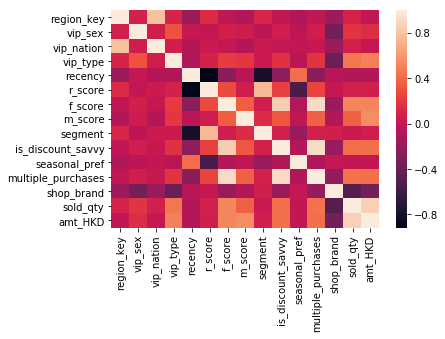

In [30]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [31]:
list(df)

['region_key',
 'vip_sex',
 'vip_nation',
 'vip_type',
 'recency',
 'r_score',
 'f_score',
 'm_score',
 'segment',
 'is_discount_savvy',
 'seasonal_pref',
 'multiple_purchases',
 'shop_brand',
 'sold_qty',
 'amt_HKD']

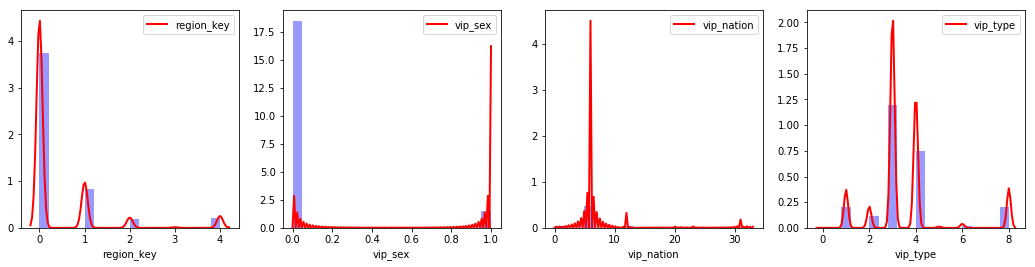

In [32]:
feature = ['region_key', 'vip_sex', 'vip_nation', 'vip_type']
index = 0
plt.figure(figsize = (18,4))
for fea in feature:
    index +=1
    plt.subplot(1, 4, index)
    plt.xlabel(fea)
    sns.distplot(df[fea], kde=True, bins=20, color='b', 
                 kde_kws={"color": "r", "lw": 2, "label": fea})

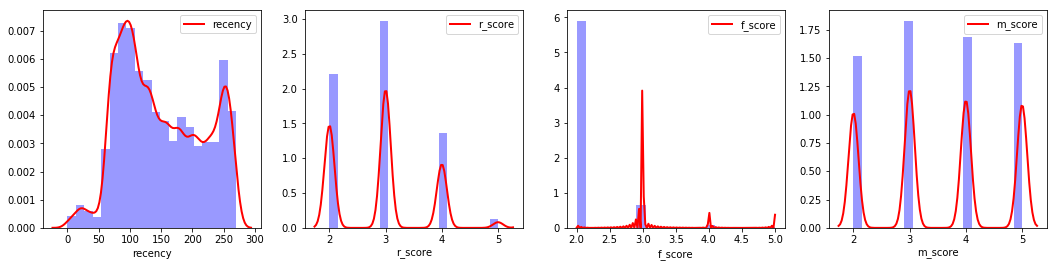

In [33]:
feature = ['recency', 'r_score', 'f_score', 'm_score']
index = 0
plt.figure(figsize = (18,4))
for fea in feature:
    index +=1
    plt.subplot(1, 4, index)
    plt.xlabel(fea)
    sns.distplot(df[fea], kde=True, bins=20, color='b', 
                 kde_kws={"color": "r", "lw": 2, "label": fea})

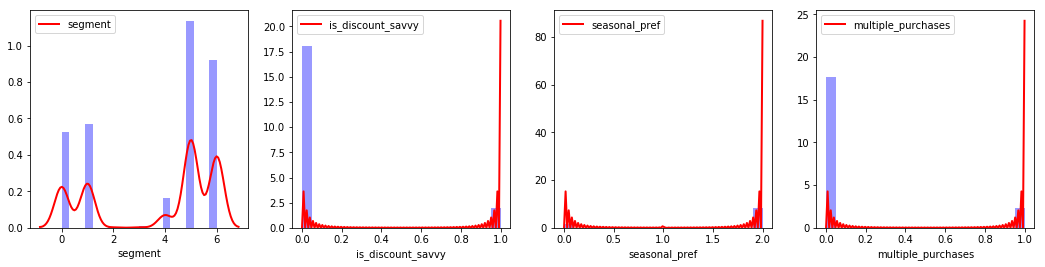

In [34]:
feature = ['segment', 'is_discount_savvy', 'seasonal_pref', 'multiple_purchases']
index = 0
plt.figure(figsize = (18,4))
for fea in feature:
    index +=1
    plt.subplot(1, 4, index)
    plt.xlabel(fea)
    sns.distplot(df[fea], kde=True, bins=20, color='b', 
                 kde_kws={"color": "r", "lw": 2, "label": fea})

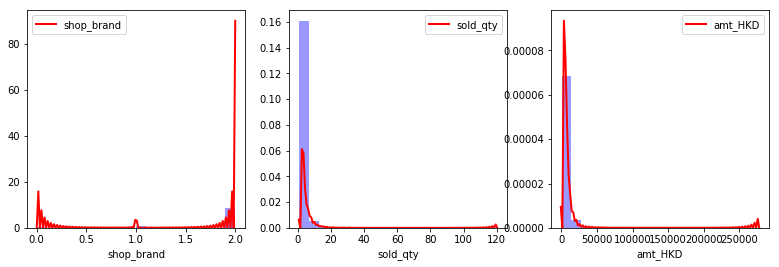

In [35]:
feature = ['shop_brand', 'sold_qty', 'amt_HKD']
index = 0
plt.figure(figsize = (18,4))
for fea in feature:
    index +=1
    plt.subplot(1, 4, index)
    plt.xlabel(fea)
    sns.distplot(df[fea], kde=True, bins=20, color='b', 
                 kde_kws={"color": "r", "lw": 2, "label": fea}) 

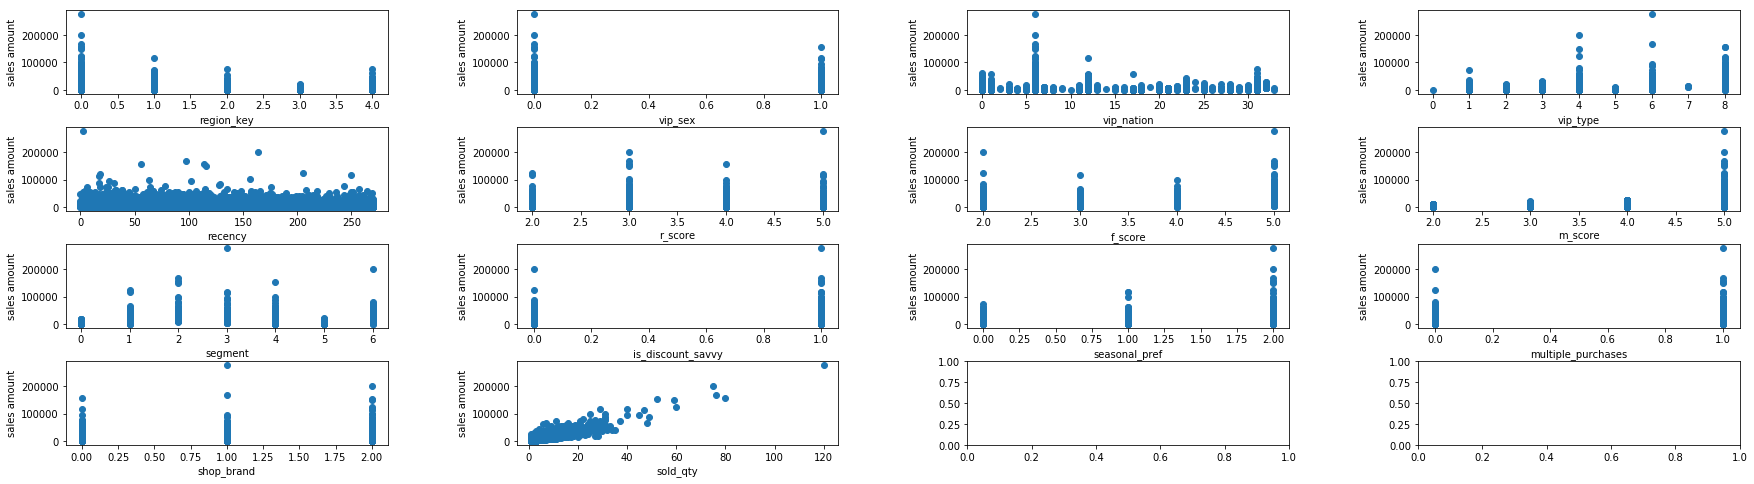

In [37]:
feature = ['region_key', 'vip_sex', 'vip_nation', 'vip_type', 'recency',
           'r_score', 'f_score', 'm_score', 'segment', 'is_discount_savvy', 'seasonal_pref',
           'multiple_purchases', 'shop_brand', 'sold_qty']

fig,axes = plt.subplots(4, 4, figsize=(30,8))
fig.subplots_adjust(wspace=.4, hspace=.4)
for i in range(14):
    row, col = i // 4, i % 4
    axes[row][col].scatter(df[feature[i]], df['amt_HKD'])
    axes[row][col].set_xlabel(feature[i])
    axes[row][col].set_ylabel('sales amount')
plt.show()

In [42]:
features = df.drop(['amt_HKD', 'sold_qty'], 1)
target = df['amt_HKD']

In [43]:
model_LR = LinearRegression()
model_LR.fit(features, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
model_LR.coef_

array([-1.89564384e+02, -7.81124712e+02,  1.24608371e+01,  9.95568081e+02,
        3.82245404e+00, -5.90058475e+02,  9.61664137e+03,  1.97620060e+03,
        2.22751194e+02,  2.50832819e+03, -6.50853286e+01, -9.53102220e+03,
       -2.07744383e+03])

In [45]:
model_LR.intercept_

-20223.63830657395

In [46]:
y_true = target
y_hat = model_LR.predict(features)

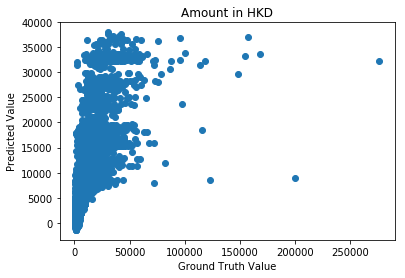

In [47]:
plt.plot(y_true, y_hat, 'o')
plt.title('Amount in HKD')
plt.xlabel('Ground Truth Value')
plt.ylabel('Predicted Value')
plt.show()

In [48]:
from sklearn.metrics import r2_score

In [49]:
print("R2: " + str(r2_score(y_true, y_hat)))

R2: 0.5898740961332095


In [50]:
y_true = pd.DataFrame(y_true)

In [51]:
y_hat = pd.DataFrame(y_hat) 

In [52]:
result = y_true.join(y_hat)

In [53]:
result['difference'] = result[0] - result['amt_HKD']

In [54]:
result

,amt_HKD,0,difference
0,5602.00,4730.380163,-871.619837
1,7849.00,6929.331956,-919.668044
2,4819.50,4730.380163,-89.119837
3,5749.50,4730.380163,-1019.119837
4,8701.50,6929.331956,-1772.168044
5,6617.00,6929.331956,312.331956
6,4193.00,4730.380163,537.380163
7,4670.00,6929.331956,2259.331956
8,2462.00,2345.155690,-116.844310
9,6250.00,6520.308082,270.308082


In [55]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(features)
est = sm.OLS(target, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                amt_HKD   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     6054.
Date:                Fri, 26 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:29:48   Log-Likelihood:            -5.2693e+05
No. Observations:               54734   AIC:                         1.054e+06
Df Residuals:                   54720   BIC:                         1.054e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.022e+04    334

/Users/baochen/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
